# CleanCarChecker


In [1]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from PIL import Image

## Preprocessing of data
* Normalizing input (rescale)
* Slight rotation and width/height shift
* Vertical flips

In [2]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.05,
    brightness_range=(0.9, 1.1),
    horizontal_flip=True
)

## Load training data

* Size: 500 x 250
* Batch size of 32 is good default value

In [3]:
train_dir = "./data_clean"
IMG_WIDTH = 300
IMG_HEIGHT = 200
batch_size = 32

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

print(train_data_gen.class_indices)

Found 1892 images belonging to 2 classes.
{'cars': 0, 'e-cars': 1}


## Display samples from training set
* for verification of image processing

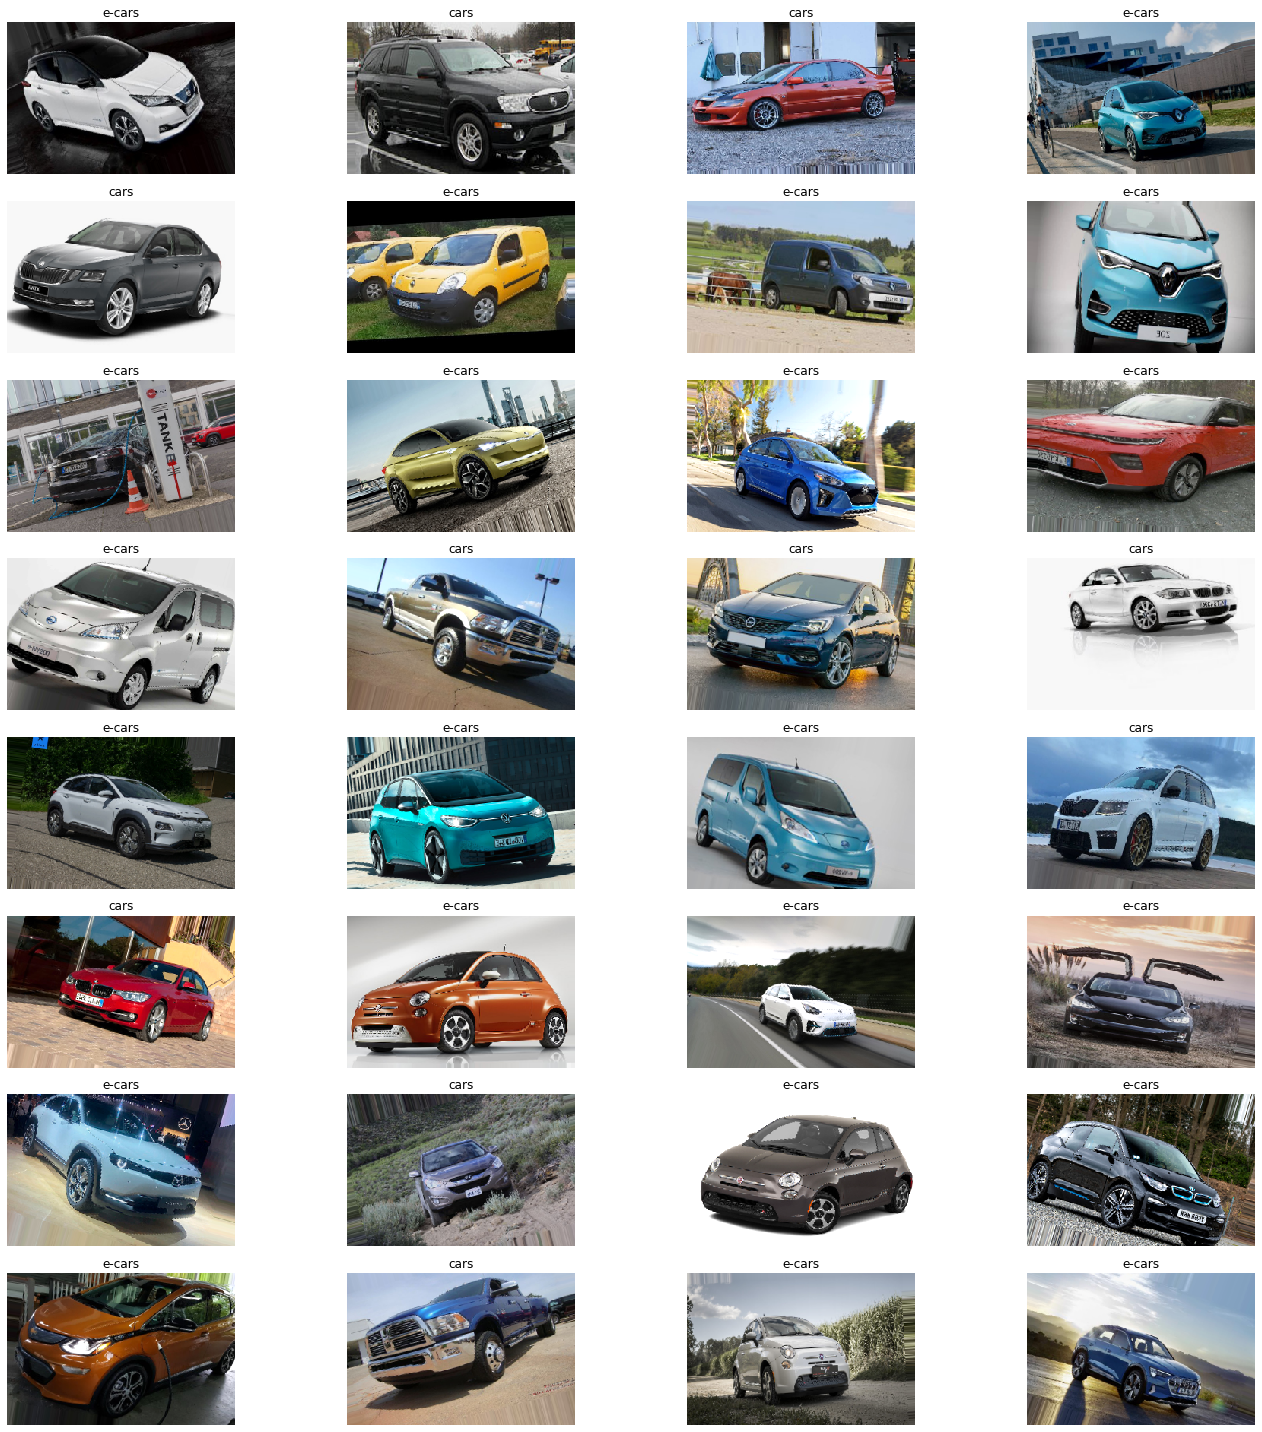

In [4]:
sample_training_images, labels = next(train_data_gen)
class_label = {v:k for k,v in train_data_gen.class_indices.items()}
fig, axes = plt.subplots(8, 4, figsize=(20,20))
axes = axes.flatten()
for img, label, ax in zip(sample_training_images, labels, axes):
    ax.set_title(class_label[np.argmax(label)])
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()

## Building the model

* First layer (Flatten) transforms the 2D-array (IMG_WIDTH x IMG_HEIGHT) to a 1-D array
* Last layer uses as activation "softmax" with number of classes (2) as argument for one-hot encoding

* All layers are fully-connected

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Dense(256, 'relu'),
    tf.keras.layers.Dense(train_data_gen.num_classes, 'softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 180000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               46080256  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 46,080,770
Trainable params: 46,080,770
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [6]:
snapshot_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="./snapshots",
    verbose=1)

def skip_broken_images(gen):
    while True:
        try:
            data, labels = next(gen)
            yield data, labels
        except GeneratorExit:
            break
        except:
            pass

In [ ]:
history = model.fit_generator(
    skip_broken_images(train_data_gen),
    steps_per_epoch= int(round(train_data_gen.samples / batch_size)),
    epochs=50,
    callbacks=[snapshot_callback]
)

Epoch 1/50
 4/59 [=>............................] - ETA: 1:32 - loss: 6.3485 - accuracy: 0.5000

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


24/59 [===========>..................] - ETA: 52s - loss: 8.0468 - accuracy: 0.4831

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/59 [============================>.] - ETA: 1s - loss: 8.4274 - accuracy: 0.4694
Epoch 00001: saving model to ./snapshots
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 94s 2s/step - loss: 8.4042 - accuracy: 0.4710
Epoch 2/50
58/59 [============================>.] - ETA: 1s - loss: 8.5367 - accuracy: 0.4737
Epoch 00002: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 87s 1s/step - loss: 8.5192 - accuracy: 0.4747
Epoch 3/50
58/59 [============================>.] - ETA: 1s - loss: 8.5714 - accuracy: 0.4754
Epoch 00003: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 83s 1s/step - loss: 8.5438 - accuracy: 0.4769
Epoch 4/50
58/59 [============================>.] - ETA: 1s - loss: 8.5019 - accuracy: 0.4717
Epoch 00